# Ⅰ.유지이탈 분류 전처리

## 가. MYSQL에서 불러오기

## 1. 채널 데이터 불러오기

In [1]:
import pandas as pd
import pymysql
import numpy as np

conn = pymysql.connect(host='127.0.0.1', user='root', password='lpoint', db='lpoint', charset='utf8')
cur = conn.cursor()
cur.execute("select cust, chnl_dv, count(chnl_dv) from 엘페이이용_view group by cust, chnl_dv order by cust;")
result = cur.fetchall()
conn.commit()
conn.close()
df_ch = pd.DataFrame(result)

In [2]:
df_ch.columns=['cust','채널','사용량']
df_ch

,cust,채널,사용량
0,M000136117,1,1
1,M000136117,2,3
2,M000419293,1,16
3,M000419293,2,26
4,M000494848,1,6
...,...,...,...
13046,M999599111,2,77
13047,M999770689,1,74
13048,M999770689,2,5
13049,M999962961,1,9


## 2. 제휴사 데이터 불러오기

In [3]:
conn = pymysql.connect(host='127.0.0.1', user='root', password='lpoint', db='lpoint', charset='utf8')
cur = conn.cursor()
cur.execute("select cust, cop_c, count(cop_c) from 엘페이이용_view group by cust, cop_c order by cust;")
result = cur.fetchall()
conn.commit()
conn.close()
df_cop = pd.DataFrame(result)

In [4]:
df_cop.columns=['cust','제휴사','이용량']
df_cop

,cust,제휴사,이용량
0,M000136117,A01,1
1,M000136117,A06,2
2,M000136117,D01,1
3,M000419293,A01,15
4,M000419293,A02,1
...,...,...,...
30263,M999962961,A02,1
30264,M999962961,A03,1
30265,M999962961,A06,6
30266,M999962961,C02,1


## 3. 총사용량 데이터 불러오기

In [5]:
conn = pymysql.connect(host='127.0.0.1', user='root', password='lpoint', db='lpoint', charset='utf8')
cur = conn.cursor()
cur.execute("select cust, count(*) from 엘페이이용_view group by cust order by cust;")
result = cur.fetchall()
conn.commit()
conn.close()
df_total = pd.DataFrame(result)

In [6]:
df_total.columns=['cust','총사용량']

df_total

,cust,총사용량
0,M000136117,4
1,M000419293,42
2,M000494848,94
3,M000557840,38
4,M000871427,5
...,...,...
8901,M999227380,2
8902,M999268192,30
8903,M999599111,77
8904,M999770689,79


## 4. 성별 데이터 불러오기

In [7]:
import pandas as pd
import pymysql

conn = pymysql.connect(host='127.0.0.1', user='root', password='lpoint', db='lpoint', charset='utf8')
cur = conn.cursor()
cur.execute("select a.cust, ma_fem_dv from 엘페이이용_view a join 고객정보 b on a.cust = b.cust group by cust order by cust;")
result = cur.fetchall()
conn.commit()
conn.close()
df_sex = pd.DataFrame(result)

In [8]:
df_sex.columns=['cust','ma_fem_dv']
for i in range(len(df_sex)):
    if df_sex["ma_fem_dv"].iloc[i] == '여성':
        df_sex["ma_fem_dv"].iloc[i] = 1
    else:
        df_sex["ma_fem_dv"].iloc[i] = 0

In [9]:
df_sex

,cust,ma_fem_dv
0,M000136117,1
1,M000419293,1
2,M000494848,1
3,M000557840,0
4,M000871427,1
...,...,...
8901,M999227380,1
8902,M999268192,1
8903,M999599111,1
8904,M999770689,1


## 5. count_days 데이터 불러오기

In [10]:
import pandas as pd
import pymysql

conn = pymysql.connect(host='127.0.0.1', user='root', password='lpoint', db='lpoint', charset='utf8')
cur = conn.cursor()
cur.execute("select cust, count_days from 엘페이이용정보 order by cust;")
result = cur.fetchall()
conn.commit()
conn.close()
df_count_days = pd.DataFrame(result)

In [11]:
df_count_days.columns=['cust','count_days']

In [12]:
df_count_days

,cust,count_days
0,M000136117,4
1,M000419293,30
2,M000494848,75
3,M000557840,37
4,M000871427,3
...,...,...
8901,M999227380,2
8902,M999268192,23
8903,M999599111,67
8904,M999770689,67


## 나. 모델에 넣을 DataFrame 만들기


## 1. pivot table 만들기
### - 채널
### - 제휴사

In [13]:
df_ch_pivot=df_ch.pivot('cust','채널','사용량')

for i in range(len(df_ch_pivot)):
    for j in range(len(df_ch_pivot.columns)):
        df_ch_pivot.iloc[i][j]=round(df_ch_pivot.iloc[i][j]/df_total.iloc[i][1],2)
df_ch_pivot=df_ch_pivot.fillna(0)

df_ch_pivot.columns=['offline','online']

In [14]:
df_list = df_cop['제휴사'].values.tolist()
column_name = []
for v in df_list:
    if v not in column_name:
        column_name.append(v)
column_name.sort()

df_cop_pivot=df_cop.pivot('cust','제휴사','이용량')
df_cop_pivot

for i in range(len(df_cop_pivot)):
    for j in range(len(df_cop_pivot.columns)):
        df_cop_pivot.iloc[i][j]=round(df_cop_pivot.iloc[i][j]/df_total.iloc[i][1],2)
df_cop_pivot=df_cop_pivot.fillna(0)
df_cop_pivot.columns=column_name
df_cop_pivot

,A01,A02,A03,A04,A05,A06,B01,C01,C02,D01,D02,E01,L00,L01
cust,,,,,,,,,,,,,,
M000136117,0.25,0.00,0.00,0.0,0.00,0.50,0.0,0.00,0.00,0.25,0.00,0.0,0.00,0.00
M000419293,0.36,0.02,0.00,0.0,0.00,0.00,0.0,0.05,0.00,0.10,0.00,0.0,0.02,0.45
M000494848,0.05,0.00,0.00,0.0,0.00,0.43,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.51
M000557840,0.00,1.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
M000871427,0.20,0.00,0.00,0.0,0.00,0.00,0.0,0.60,0.00,0.00,0.20,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999227380,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00
M999268192,0.00,0.00,0.00,0.0,0.03,0.03,0.0,0.00,0.00,0.03,0.00,0.0,0.37,0.53
M999599111,0.00,0.00,0.00,0.0,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.97


## 2. cust를 index로

In [15]:
df_total=df_total.set_index('cust')
df_sex=df_sex.set_index('cust')
df_count_days=df_count_days.set_index('cust')

## 3. dataframe 합치기 및 df_final 정의
### - dataframe label column 생성

In [16]:
df_final=pd.concat([df_sex,df_cop_pivot,df_ch_pivot,df_count_days],axis=1)

In [17]:
df_final["label"]=np.NaN

In [18]:
df_final

,ma_fem_dv,A01,A02,A03,A04,A05,A06,B01,C01,C02,D01,D02,E01,L00,L01,offline,online,count_days,label
cust,,,,,,,,,,,,,,,,,,,
M000136117,1,0.25,0.00,0.00,0.0,0.00,0.50,0.0,0.00,0.00,0.25,0.00,0.0,0.00,0.00,0.25,0.75,4,NaN
M000419293,1,0.36,0.02,0.00,0.0,0.00,0.00,0.0,0.05,0.00,0.10,0.00,0.0,0.02,0.45,0.38,0.62,30,NaN
M000494848,1,0.05,0.00,0.00,0.0,0.00,0.43,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.51,0.06,0.94,75,NaN
M000557840,0,0.00,1.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,37,NaN
M000871427,1,0.20,0.00,0.00,0.0,0.00,0.00,0.0,0.60,0.00,0.00,0.20,0.0,0.00,0.00,0.80,0.20,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999227380,1,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,1.00,2,NaN
M999268192,1,0.00,0.00,0.00,0.0,0.03,0.03,0.0,0.00,0.00,0.03,0.00,0.0,0.37,0.53,0.03,0.97,23,NaN
M999599111,1,0.00,0.00,0.00,0.0,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.97,0.00,1.00,67,NaN


## 4. 재이용기간이 45일 이하 고객 추출후 label 값에 이탈:0, 유지:1 넣기


In [19]:
conn = pymysql.connect(host='127.0.0.1', user='root', password='lpoint', db='lpoint', charset='utf8')
cur = conn.cursor()
cur.execute("select a.cust from 엘페이이용_view a inner join 엘페이이용정보 b on a.cust = b.cust where max_days <= 45 group by cust order by cust, cop_c;")
result = cur.fetchall()
conn.commit()
conn.close()
df_stay_45 = pd.DataFrame(result)
df_stay_45.columns=['고객번호']
df_stay_45
df_45 = df_final

In [20]:
for i in range(len(df_stay_45)):
    df_45.loc[[df_stay_45.iloc[i][0]],['label']] = 1
df_45=df_45.fillna(0)

In [21]:
df_final

,ma_fem_dv,A01,A02,A03,A04,A05,A06,B01,C01,C02,D01,D02,E01,L00,L01,offline,online,count_days,label
cust,,,,,,,,,,,,,,,,,,,
M000136117,1,0.25,0.00,0.00,0.0,0.00,0.50,0.0,0.00,0.00,0.25,0.00,0.0,0.00,0.00,0.25,0.75,4,NaN
M000419293,1,0.36,0.02,0.00,0.0,0.00,0.00,0.0,0.05,0.00,0.10,0.00,0.0,0.02,0.45,0.38,0.62,30,1.0
M000494848,1,0.05,0.00,0.00,0.0,0.00,0.43,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.51,0.06,0.94,75,1.0
M000557840,0,0.00,1.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,37,NaN
M000871427,1,0.20,0.00,0.00,0.0,0.00,0.00,0.0,0.60,0.00,0.00,0.20,0.0,0.00,0.00,0.80,0.20,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999227380,1,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,1.00,2,1.0
M999268192,1,0.00,0.00,0.00,0.0,0.03,0.03,0.0,0.00,0.00,0.03,0.00,0.0,0.37,0.53,0.03,0.97,23,NaN
M999599111,1,0.00,0.00,0.00,0.0,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.97,0.00,1.00,67,1.0


In [22]:
df_45=df_45.fillna(0)

In [23]:
df_final

,ma_fem_dv,A01,A02,A03,A04,A05,A06,B01,C01,C02,D01,D02,E01,L00,L01,offline,online,count_days,label
cust,,,,,,,,,,,,,,,,,,,
M000136117,1,0.25,0.00,0.00,0.0,0.00,0.50,0.0,0.00,0.00,0.25,0.00,0.0,0.00,0.00,0.25,0.75,4,NaN
M000419293,1,0.36,0.02,0.00,0.0,0.00,0.00,0.0,0.05,0.00,0.10,0.00,0.0,0.02,0.45,0.38,0.62,30,1.0
M000494848,1,0.05,0.00,0.00,0.0,0.00,0.43,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.51,0.06,0.94,75,1.0
M000557840,0,0.00,1.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,37,NaN
M000871427,1,0.20,0.00,0.00,0.0,0.00,0.00,0.0,0.60,0.00,0.00,0.20,0.0,0.00,0.00,0.80,0.20,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999227380,1,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,1.00,2,1.0
M999268192,1,0.00,0.00,0.00,0.0,0.03,0.03,0.0,0.00,0.00,0.03,0.00,0.0,0.37,0.53,0.03,0.97,23,NaN
M999599111,1,0.00,0.00,0.00,0.0,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.97,0.00,1.00,67,1.0


## 5. df_final 초기화

In [24]:
df_final=pd.concat([df_sex,df_cop_pivot,df_ch_pivot,df_count_days],axis=1)
df_final["label"]=np.NaN

## 6. 재이용기간이 50일 이하 고객 추출후 label 값에 이탈:0, 유지:1 넣기


In [25]:
conn = pymysql.connect(host='127.0.0.1', user='root', password='lpoint', db='lpoint', charset='utf8')
cur = conn.cursor()
cur.execute("select a.cust from 엘페이이용_view a inner join 엘페이이용정보 b on a.cust = b.cust where max_days <= 50 group by cust order by cust, cop_c;")
result = cur.fetchall()
conn.commit()
conn.close()
df_stay_50 = pd.DataFrame(result)
df_stay_50.columns=['고객번호']
df_50 = df_final

In [26]:
df_50

,ma_fem_dv,A01,A02,A03,A04,A05,A06,B01,C01,C02,D01,D02,E01,L00,L01,offline,online,count_days,label
cust,,,,,,,,,,,,,,,,,,,
M000136117,1,0.25,0.00,0.00,0.0,0.00,0.50,0.0,0.00,0.00,0.25,0.00,0.0,0.00,0.00,0.25,0.75,4,NaN
M000419293,1,0.36,0.02,0.00,0.0,0.00,0.00,0.0,0.05,0.00,0.10,0.00,0.0,0.02,0.45,0.38,0.62,30,NaN
M000494848,1,0.05,0.00,0.00,0.0,0.00,0.43,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.51,0.06,0.94,75,NaN
M000557840,0,0.00,1.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,37,NaN
M000871427,1,0.20,0.00,0.00,0.0,0.00,0.00,0.0,0.60,0.00,0.00,0.20,0.0,0.00,0.00,0.80,0.20,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999227380,1,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,1.00,2,NaN
M999268192,1,0.00,0.00,0.00,0.0,0.03,0.03,0.0,0.00,0.00,0.03,0.00,0.0,0.37,0.53,0.03,0.97,23,NaN
M999599111,1,0.00,0.00,0.00,0.0,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.97,0.00,1.00,67,NaN


In [27]:
df_stay_50

,고객번호
0,M000419293
1,M000494848
2,M000557840
3,M000986912
4,M001444118
...,...
4732,M998980052
4733,M999002436
4734,M999105944
4735,M999227380


In [28]:
for i in range(len(df_stay_50)):
    df_50.loc[[df_stay_50.iloc[i][0]],['label']] = 1
    
df_50=df_50.fillna(0)


In [29]:
df_50

,ma_fem_dv,A01,A02,A03,A04,A05,A06,B01,C01,C02,D01,D02,E01,L00,L01,offline,online,count_days,label
cust,,,,,,,,,,,,,,,,,,,
M000136117,1,0.25,0.00,0.00,0.0,0.00,0.50,0.0,0.00,0.00,0.25,0.00,0.0,0.00,0.00,0.25,0.75,4,0.0
M000419293,1,0.36,0.02,0.00,0.0,0.00,0.00,0.0,0.05,0.00,0.10,0.00,0.0,0.02,0.45,0.38,0.62,30,1.0
M000494848,1,0.05,0.00,0.00,0.0,0.00,0.43,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.51,0.06,0.94,75,1.0
M000557840,0,0.00,1.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,37,1.0
M000871427,1,0.20,0.00,0.00,0.0,0.00,0.00,0.0,0.60,0.00,0.00,0.20,0.0,0.00,0.00,0.80,0.20,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999227380,1,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,1.00,2,1.0
M999268192,1,0.00,0.00,0.00,0.0,0.03,0.03,0.0,0.00,0.00,0.03,0.00,0.0,0.37,0.53,0.03,0.97,23,0.0
M999599111,1,0.00,0.00,0.00,0.0,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.97,0.00,1.00,67,1.0


# Ⅱ. 이탈유지분류_SVM

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## 가. 기준 : 45일

## 1. 모델 생성

In [31]:
X = df_45.drop('label', axis=1)
y = df_45.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


학습데이터 점수
 [[0.7728585178055823, 0.7946743663779275, 0.80093038177735, 0.8084696823869105, 0.6132499197946744], [0.7712544112929098, 0.7941931344241258, 0.803496952197626, 0.8410330445941611, 0.9239653512993262], [0.7909849213987808, 0.8020532563362207, 0.8124799486685916, 0.9003849855630414, 0.945460378569137], [0.7932306705165223, 0.8042990054539622, 0.8392685274302214, 0.9372794353545075, 0.9509143407122232]]
테스트데이터 점수
 [[0.7758233532934131, 0.7900449101796407, 0.7945359281437125, 0.7870508982035929, 0.594311377245509], [0.7694610778443114, 0.7915419161676647, 0.7930389221556886, 0.7900449101796407, 0.7526197604790419], [0.7904191616766467, 0.7937874251497006, 0.7941616766467066, 0.7638473053892215, 0.7395209580838323], [0.7907934131736527, 0.7949101796407185, 0.7881736526946108, 0.7402694610778443, 0.7387724550898204]]
[0.7907934131736527, 0.7949101796407185, 0.7881736526946108, 0.7402694610778443, 0.7387724550898204]


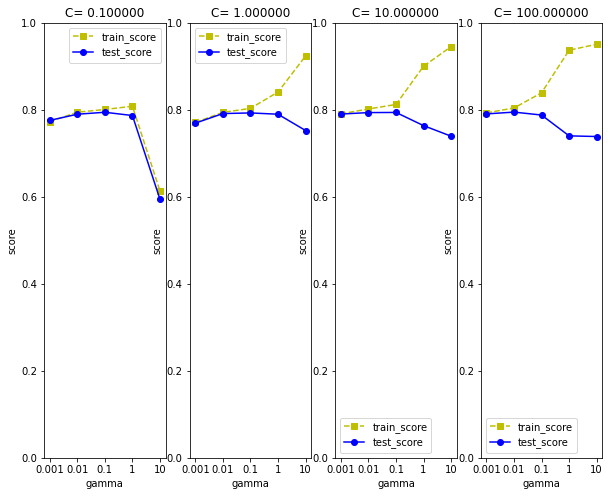

In [32]:
C = [0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10]
s_train=[]
s_test=[]

for c in C:
    s1=[]
    s2=[]
    for g in gamma:
        
        model=SVC(C=c,gamma=g)
        model.fit(X_train,y_train)

        pred_y=model.predict(X_test)

        s1.append(model.score(X_train,y_train))
        s2.append(model.score(X_test,y_test))
        
        
    s_train.append(s1)
    s_test.append(s2)
    
    
fig = plt.figure(figsize=[10,8])

for i in range(len(C)):
    plt.subplot(1,len(C),i+1)
    plt.plot(s_train[i],'ys--',label='train')
    plt.plot(s_test[i],'bo-',label='test')
    plt.title('C= %f' % (C[i]))
    plt.xticks(range(len(gamma)),gamma)
    plt.ylim(0,1)
    plt.xlabel('gamma')
    plt.ylabel('score')
    plt.legend(('train_score','test_score'))


print("학습데이터 점수\n",s_train)

print("테스트데이터 점수\n", s_test)

print(max(s_test))


## 2. 평가지표

In [33]:
model=SVC(C=100,gamma=0.01)
model.fit(X_train,y_train)


print(model.score(X_test,y_test))
pred_y=model.predict(X_test)


confusion_matrix(y_test,pred_y)

0.7949101796407185


array([[1173,  150],
       [ 398,  951]], dtype=int64)

In [34]:
ac_score = accuracy_score(y_test, pred_y)
print(ac_score)

pre_score = precision_score(y_test, pred_y, pos_label=1)
print("precision_1:", pre_score)


pre_score = precision_score(y_test, pred_y, pos_label=0)
print("precision_0:", pre_score)


re_score=recall_score(y_test, pred_y, pos_label=1)
print("recall_1 : ",re_score)


re_score=recall_score(y_test, pred_y, pos_label=0)
re_score
print("recall_0 : ",re_score)

f1= f1_score(y_test, pred_y, pos_label=1)
print("F1 Score: ",f1)


f1= f1_score(y_test, pred_y, pos_label=0)
print("F1 Score: ",f1)


0.7949101796407185
precision_1: 0.8637602179836512
precision_0: 0.746658179503501
recall_1 :  0.7049666419570052
recall_0 :  0.8866213151927438
F1 Score:  0.776326530612245
F1 Score:  0.8106427090532137


## 나. 기준 : 50일


## 1. 모델 생성

In [35]:
X = df_50.drop('label', axis=1)
y = df_50.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

학습데이터 점수
 [[0.7410972088546679, 0.7850497273018928, 0.788418350978505, 0.8007699711260827, 0.9031119666345845], [0.7682066089188322, 0.7864934231632981, 0.7919473853063843, 0.8315688161693936, 0.9149823548283607], [0.7840872633942894, 0.7908245107475136, 0.8067051652229708, 0.8901187038819378, 0.940808469682387], [0.7848893166506256, 0.7929098492139878, 0.8326916907282643, 0.9302213666987488, 0.9483477702919474]]
테스트데이터 점수
 [[0.7357784431137725, 0.780314371257485, 0.7799401197604791, 0.7713323353293413, 0.6549401197604791], [0.7514970059880239, 0.781062874251497, 0.7784431137724551, 0.7735778443113772, 0.7305389221556886], [0.7668413173652695, 0.7825598802395209, 0.7791916167664671, 0.750374251497006, 0.7279191616766467], [0.781437125748503, 0.7840568862275449, 0.7623502994011976, 0.7320359281437125, 0.7208083832335329]]
[0.781437125748503, 0.7840568862275449, 0.7623502994011976, 0.7320359281437125, 0.7208083832335329]


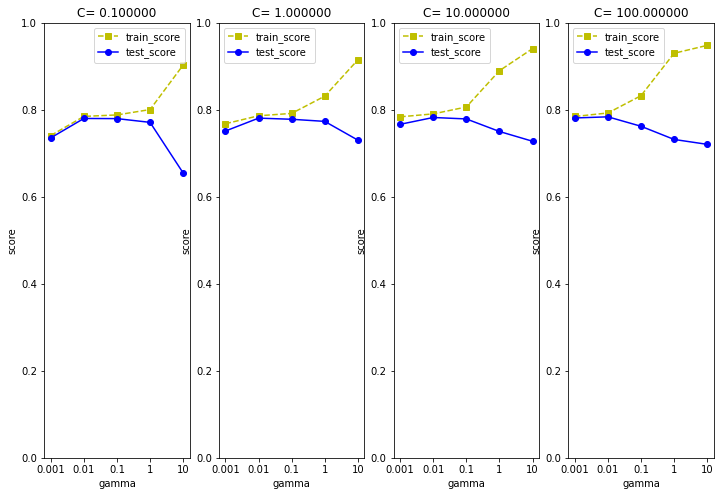

In [36]:
C = [0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10]
s_train=[]
s_test=[]

for c in C:
    s1=[]
    s2=[]
    
    for g in gamma:

        model=SVC(C=c,gamma=g)
        model.fit(X_train,y_train)

        pred_y=model.predict(X_test)

        s1.append(model.score(X_train,y_train))
        s2.append(model.score(X_test,y_test))
        
        
    s_train.append(s1)
    s_test.append(s2)
    
    
fig = plt.figure(figsize=[12,8])

for i in range(len(C)):
    plt.subplot(1,len(C),i+1)
    plt.plot(s_train[i],'ys--',label='train')
    plt.plot(s_test[i],'bo-',label='test')
    plt.title('C= %f' % (C[i]))
    plt.xticks(range(len(gamma)),gamma)
    plt.ylim(0,1)
    plt.xlabel('gamma')
    plt.ylabel('score')
    plt.legend(('train_score','test_score'))

    
print("학습데이터 점수\n",s_train)

print("테스트데이터 점수\n", s_test)

print(max(s_test))

## 2. 평가지표

In [37]:
model=SVC(C=1.0,gamma=0.01)
model.fit(X_train,y_train)


print(model.score(X_test,y_test))
pred_y=model.predict(X_test)

confusion_matrix(pred_y, y_test)

confusion_matrix(y_test,pred_y)

0.781062874251497


array([[1027,  220],
       [ 365, 1060]], dtype=int64)

In [38]:
ac_score = accuracy_score(y_test, pred_y)
print(ac_score)

pre_score = precision_score(y_test, pred_y, pos_label=1)
print("precision_1:", pre_score)


pre_score = precision_score(y_test, pred_y, pos_label=0)
print("precision_0:", pre_score)


re_score=recall_score(y_test, pred_y, pos_label=1)
print("recall_1 : ",re_score)


re_score=recall_score(y_test, pred_y, pos_label=0)
re_score
print("recall_0 : ",re_score)

f1= f1_score(y_test, pred_y, pos_label=1)
print("F1 Score: ",f1)


f1= f1_score(y_test, pred_y, pos_label=0)
print("F1 Score: ",f1)


0.781062874251497
precision_1: 0.828125
precision_0: 0.7377873563218391
recall_1 :  0.743859649122807
recall_0 :  0.8235765838011226
F1 Score:  0.7837338262476894
F1 Score:  0.7783251231527094
